In [ ]:
from os import path
import os
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import *
import tensorflow as tf

In [ ]:
from google.colab import drive
from os import path
import os
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/wq.csv',  encoding='utf-8')

print(df.shape)

df.head()

(1973, 11)


,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500


In [ ]:
np.corrcoef(df['TOTAL_COLIFORM'].astype(np.float64), df['FECAL_COLIFORM'].astype(np.float64))

array([[1.        , 0.98005028],
       [0.98005028, 1.        ]])

In [ ]:
del df['TOTAL_COLIFORM']

In [ ]:
df = df.replace('NAN', np.nan).dropna()

In [ ]:
start=0
end=877
station=df.iloc [start:end ,0]
location=df.iloc [start:end ,1]
state=df.iloc [start:end ,2]
do= df.iloc [start:end ,4].astype(np.float64)
value=0
ph = df.iloc[ start:end,5].astype(np.float64)
co = df.iloc [start:end ,6].astype(np.float64)
bod = df.iloc [start:end ,7].astype(np.float64)
na= df.iloc [start:end ,8].astype(np.float64)
fc=df.iloc [2:end ,9].astype(np.float64)

In [ ]:
df=pd.concat([station,location,state,do,ph,co,bod,na,fc],axis=1)
df.columns = ['station','location','state','do','ph','co','bod','na','fc']


In [ ]:
df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
df['ndo']=df.do.apply(lambda x:(100 if (x>=6)
                                 else(80 if  (6>=x>=5.1)
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3)
                                              else 0)))))
df['nco']=df.fc.apply(lambda x:(100 if (5>=x>=0)
                                 else(80 if  (50>=x>=5)
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500)
                                              else 0)))))
df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)
                                 else(80 if  (6>=x>=3)
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80)
                                              else 0)))))
df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)
                                 else(80 if  (150>=x>=75)
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225)
                                              else 0)))))
df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)
                                 else(80 if  (50>=x>=20)
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100)
                                              else 0)))))

df.head()

,station,location,state,do,ph,co,bod,na,fc,npH,ndo,nco,nbdo,nec,nna
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,100,80,0,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,NaN,80,100,0,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,5382.0,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,3428.0,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,2853.0,100,80,40,100,80,100


In [ ]:
df.dtypes
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco
df
df['quality']=df.wqi.apply(lambda x:('Excellent' if (25>=x>=0)
                                 else('Good' if  (50>=x>=26)
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76)
                                              else 'Unsuitable')))))
actual = df['quality']
df

,station,location,state,do,ph,co,bod,na,fc,npH,...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,quality
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.70,7.20,189.0,2.00,0.20,NaN,100,...,60,100,16.5,22.48,23.40,0.54,2.8,0.00,65.72,Poor
2,1475,ZUARI AT PANCHAWADI,GOA,6.30,6.90,179.0,1.70,0.10,NaN,80,...,60,100,13.2,28.10,23.40,0.54,2.8,0.00,68.04,Poor
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.80,6.90,64.0,3.80,0.50,5382.0,80,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,Poor
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.80,7.30,83.0,1.90,0.40,3428.0,100,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,Very Poor
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.50,7.40,81.0,1.50,0.10,2853.0,100,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1148,"AMBIKA AT BILIMORA,",GUJARAT,6.20,7.80,7778.0,2.70,0.26,2880.0,100,...,0,100,16.5,28.10,23.40,0.00,2.8,11.24,82.04,Very Poor
1025,1438,"MINDHOLA AT STATE HIGHWAY BRIDGE SACHIN,",GUJARAT,3.20,7.70,885.0,6.30,0.51,3900.0,100,...,0,100,16.5,11.24,14.04,0.00,2.8,11.24,55.82,Poor
1191,1633,SIMSANG RIVER WILLIAMNAGAR,MIZORAM,8.23,7.38,143.0,1.55,3.55,255.0,100,...,80,100,16.5,28.10,23.40,0.72,2.8,16.86,88.38,Very Poor
1197,1404,GUMTI AT D/S SOUTH TRIPURA,tripura,6.20,7.70,176.0,3.50,0.20,532.0,100,...,60,100,16.5,28.10,18.72,0.54,2.8,11.24,77.90,Very Poor


In [ ]:
data = df.iloc[:,9:15].values
pred = df.iloc[:,21:22].values

In [ ]:
data.shape

(877, 6)

In [ ]:
from sklearn.model_selection import train_test_split
data_train,data_test,pred_train,pred_test = train_test_split(data,pred,test_size=0.20,random_state=1)
pred_train.shape

(701, 1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(350,input_dim=6, activation='relu'))
model.add(Dense(350,activation='relu'))
#model.add(Dense(350,activation='relu'))
model.add(Dense(1,activation='linear'))

tf.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False )
model.compile(loss='mean_squared_error',optimizer='Adam', metrics=['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 350)               2450      
                                                                 
 dense_8 (Dense)             (None, 350)               122850    
                                                                 
 dense_9 (Dense)             (None, 1)                 351       
                                                                 
Total params: 125,651
Trainable params: 125,651
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
perform = model.fit(data_train,pred_train,epochs=20,batch_size=16)

Epoch 1/20
44/44 [==============================] - 1s 4ms/step - loss: 399.4959 - mse: 399.4959
Epoch 2/20
44/44 [==============================] - 0s 4ms/step - loss: 2.4946 - mse: 2.4946
Epoch 3/20
44/44 [==============================] - 0s 4ms/step - loss: 0.3656 - mse: 0.3656
Epoch 4/20
44/44 [==============================] - 0s 4ms/step - loss: 0.1647 - mse: 0.1647
Epoch 5/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0935 - mse: 0.0935
Epoch 6/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0935 - mse: 0.0935
Epoch 7/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0530 - mse: 0.0530
Epoch 8/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0403 - mse: 0.0403
Epoch 9/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0404 - mse: 0.0404
Epoch 10/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0302 - mse: 0.0302
Epoch 11/20
44/44 [==============================] - 0s 4ms/step 

RMSE  :  0.11302407908166097


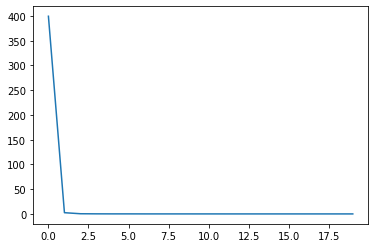

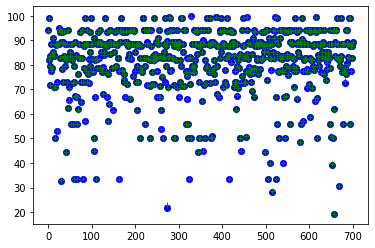

In [ ]:
prediction = model.predict(data_train)
from sklearn.metrics import mean_squared_error
from math import sqrt
print('RMSE  : ',sqrt(mean_squared_error(pred_train,prediction)))
plt.figure(0)
plt.plot(perform.history['loss'])
plt.figure(1)
plt.plot(pred_train,'bo',prediction,'g+')

In [ ]:
data_train

array([[100, 100,  80, 100,  80, 100],
       [100, 100, 100, 100,   0, 100],
       [100, 100,  40, 100,   0, 100],
       ...,
       [100, 100,  60, 100,   0, 100],
       [100, 100,  40, 100,  80, 100],
       [100, 100,  80,  80,  80, 100]])

In [ ]:
import os
dir=os.listdir('gdrive/My Drive/Colab Notebooks/Stations')
dir

['1198.csv',
 '1322.csv',
 '50.csv',
 '1320.csv',
 '1171.csv',
 '1386.csv',
 '1195.csv',
 '51.csv',
 '34.csv',
 '1323.csv',
 '33.csv',
 '1324.csv',
 '1203.csv',
 '31.csv',
 '1325.csv',
 '1451.csv',
 '1326.csv',
 '1202.csv',
 '1327.csv',
 '1206.csv']

In [ ]:
def convert_df(df):
  df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)
                                  else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                        else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                            else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                                else 0)))))
  df['ndo']=df.do.apply(lambda x:(100 if (x>=6)
                                  else(80 if  (6>=x>=5.1)
                                        else(60 if (5>=x>=4.1)
                                            else(40 if (4>=x>=3)
                                                else 0)))))
  df['nco']=df.fc.apply(lambda x:(100 if (5>=x>=0)
                                  else(80 if  (50>=x>=5)
                                        else(60 if (500>=x>=50)
                                            else(40 if (10000>=x>=500)
                                                else 0)))))
  df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)
                                  else(80 if  (6>=x>=3)
                                        else(60 if (80>=x>=6)
                                            else(40 if (125>=x>=80)
                                                else 0)))))
  df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)
                                  else(80 if  (150>=x>=75)
                                        else(60 if (225>=x>=150)
                                            else(40 if (300>=x>=225)
                                                else 0)))))
  df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)
                                  else(80 if  (50>=x>=20)
                                        else(60 if (100>=x>=50)
                                            else(40 if (200>=x>=100)
                                                else 0)))))
  return df

In [ ]:
df3=pd.DataFrame()
yearly_df = pd.DataFrame()
station_df = pd.DataFrame()

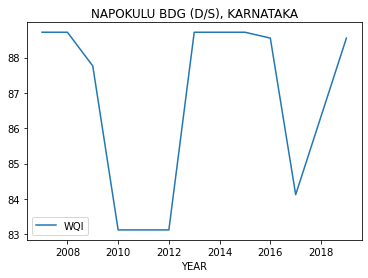

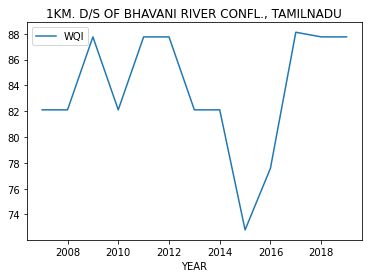

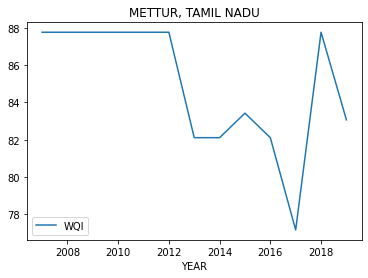

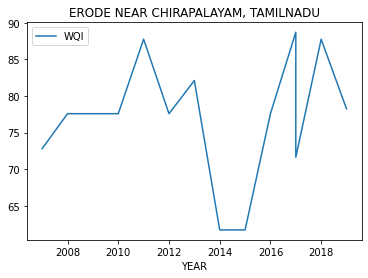

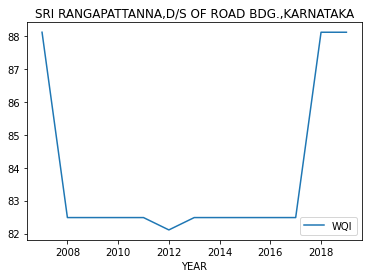

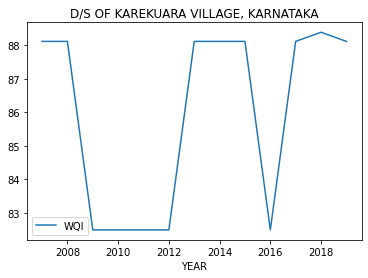

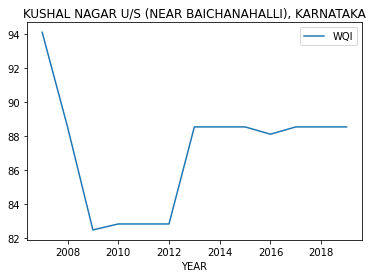

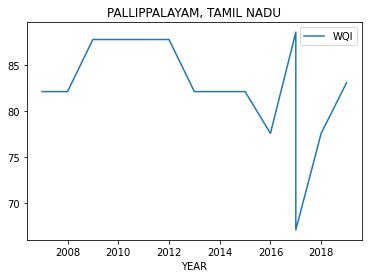

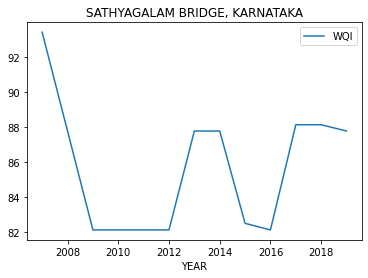

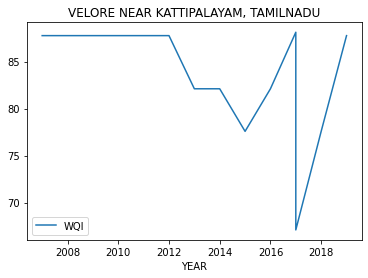

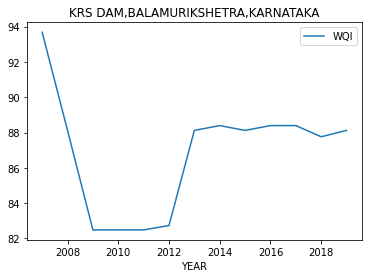

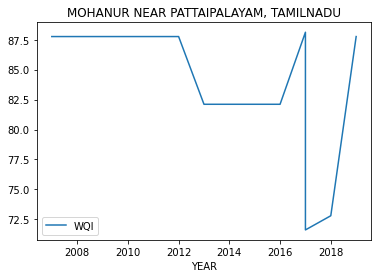

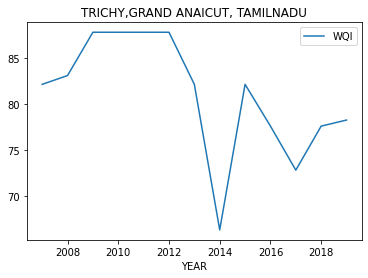

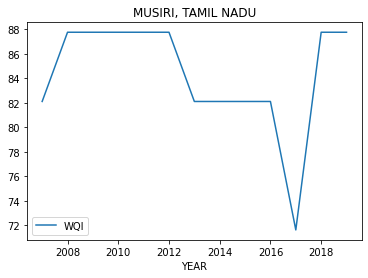

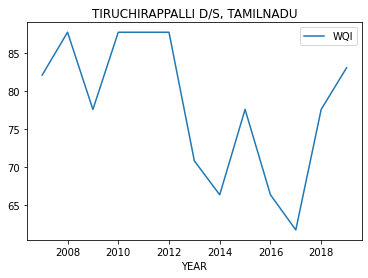

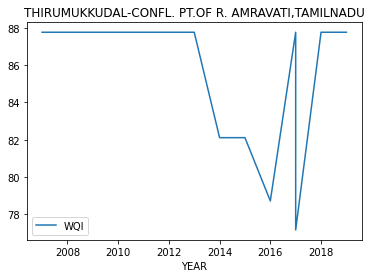

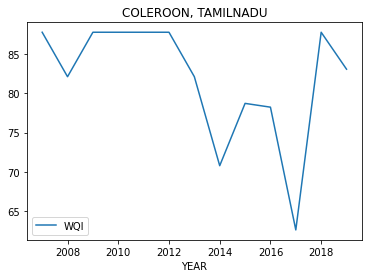

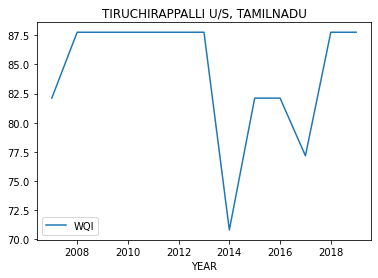

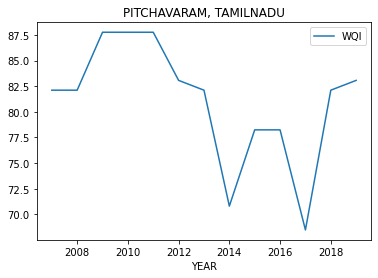

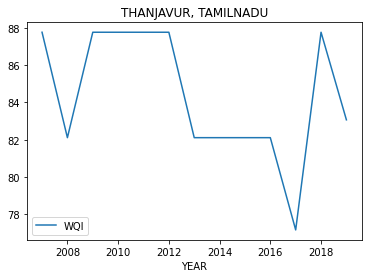

In [ ]:
path = 'gdrive/My Drive/Colab Notebooks/station-code.xlsx'
temp_df = pd.read_excel(path,header=0)
temp=[]
for i in dir:
  path='gdrive/My Drive/Colab Notebooks/Stations/'+i
  df1 = pd.read_csv(path)
  df1=df1.drop(df1.columns[0], axis=1)
  df1=df1.drop(df1.columns[2], axis=1)
  df1.columns = ['station','do','ph','co','bod','na','fc','year']
  first_column = df1.pop('year')
  df1.insert(0, 'year', first_column)
  df2 = convert_df(df1)
  data1 = df2.filter(['npH','ndo','nco','nbdo','nec','nna'], axis=1)
  wqi = model.predict(data1)
  df_final=pd.DataFrame(wqi, columns = ['WQI'])
  df_final.insert(0, 'YEAR', first_column)
  path = 'gdrive/My Drive/Colab Notebooks/Stations_final/'+i
  df_final['YEAR'] = pd.DatetimeIndex(df_final['YEAR']).year
  df_final.to_csv(path)
  j = temp_df['LOCATIONS'].loc[temp_df['STATION CODE'] == int(i[:-4])]
  j=j.values
  df_final.plot(x='YEAR',title=j[0])

  df_final['Station'] = pd.Series([i[:-4] for x in range(len(df_final.index))])
  temp.append(j[0])
  df3 = pd.concat([df3, df_final])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


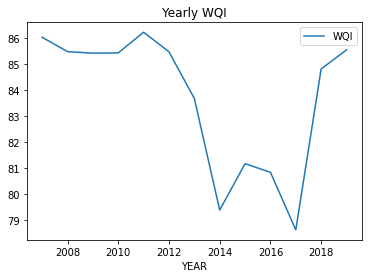

In [ ]:
yearly_df = df3.groupby(df3['YEAR'])['YEAR','WQI'].transform('mean')
yearly_df['YEAR'] = yearly_df['YEAR'].astype(int)
yearly_df = yearly_df.tail(13)
yearly_df.plot(x='YEAR',y='WQI',kind='line',title='Yearly WQI')

In [ ]:
df3

,YEAR,WQI,Station
0,2007,88.714890,1198
1,2008,88.714890,1198
2,2009,87.761185,1198
3,2010,83.121460,1198
4,2011,83.121460,1198
...,...,...,...
8,2015,82.109138,1206
9,2016,82.109138,1206
10,2017,77.163513,1206
11,2018,87.761185,1206


In [ ]:
station_df = df3.groupby(df3['Station'])['WQI'].mean()
station_df = pd.DataFrame({'Station':station_df.index, 'WQI':station_df.values})
station_df.set_index('Station',inplace=True)
station_df = station_df.reindex(['1198', '1195','33','1386','1171','34','50','1322','51','1320','1323','1324','1451','31','1202','1325','1203','1206','1326','1327'])

path = 'gdrive/My Drive/Colab Notebooks/station-code.xlsx'
temp_df = pd.read_excel(path,header=0)
temp_df['STATION CODE'] = temp_df['STATION CODE'].astype(str)
temp_df.set_index('STATION CODE',inplace=True)



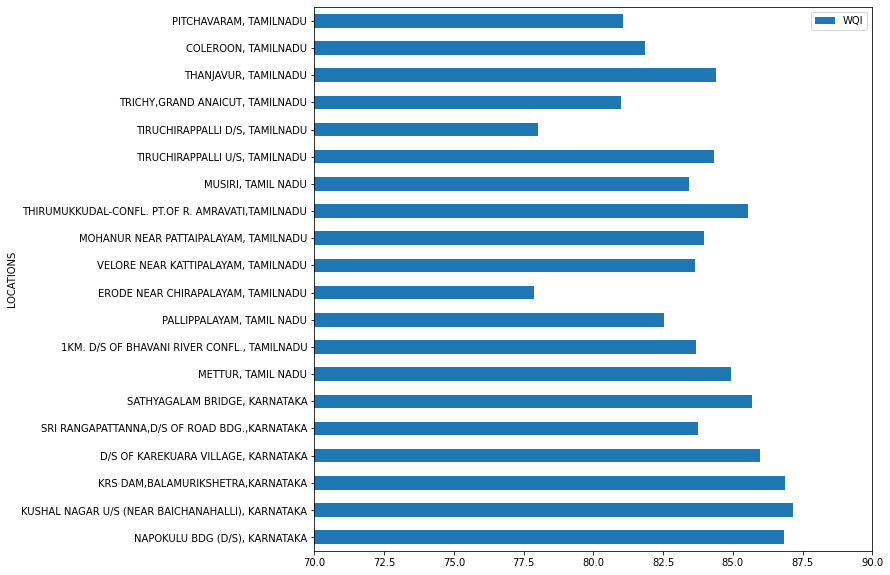

In [ ]:

station_df = station_df.join(temp_df)
station_df.set_index('LOCATIONS',inplace=True)

station_df.plot.barh(xlim=(70,90),figsize=(10,10))


In [ ]:

station_df

,WQI
LOCATIONS,
"NAPOKULU BDG (D/S), KARNATAKA",86.826614
"KUSHAL NAGAR U/S (NEAR BAICHANAHALLI), KARNATAKA",87.160263
"KRS DAM,BALAMURIKSHETRA,KARNATAKA",86.869080
"D/S OF KAREKUARA VILLAGE, KARNATAKA",85.974274
"SRI RANGAPATTANNA,D/S OF ROAD BDG.,KARNATAKA",83.756462
"SATHYAGALAM BRIDGE, KARNATAKA",85.671120
"METTUR, TAMIL NADU",84.946739
"1KM. D/S OF BHAVANI RIVER CONFL., TAMILNADU",83.681458
"PALLIPPALAYAM, TAMIL NADU",82.533455
